# Understanding data

## Setup
### Imports
In order to work with data, we need to import some libraries.

In [43]:
import pandas as pd                     # for dataset manipulation (DataFrames)
import sklearn.datasets                 # the datasets we are going to use
import numpy as np                      # allows some mathematical operations
import matplotlib.pyplot as plt         # library used to display graphs
import seaborn as sns                   # more convenient visualization library for dataframes

### Loading the dataset

In [44]:
iris = sklearn.datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
#df = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])

The dataset is now loaded into the `df` variable, which stands for "DataFrame".
DataFrames are objects proposed by the `pandas` library. They are basically convenient tables, with a lot of built-in functions to manipulate them.

You can see what the dataframe looks like by executing the cell below :

In [45]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## Data understanding
### Data source and documentation
Before even writing any code, it is important to check where the data is coming from and gather as much information as possible on the data it contains.
The iris dataset - that we loaded above - is a popular dataset to teach machine learning, meaning information is easily accessible on the internet.


#### Questions
**Before beginning the data analysis, find the answers to the following questions:**
- Who created the dataset? When and why?
- Describe briefly what the iris dataset contains.
- What information does the columns contain?
- In particular, what is the `target` column, and what does its values correspond to?

*Hint: We use the `scikit-learn` library to load the dataset.*


#### Answers
- This dataset was created by Ronald Fisher in 1936 as an example of linear discriminant analysis.
- The dataset contains measurements of different iris flowers.
- The columns contain petals and sepals width and length and the type of iris flower.
- The target column indicates the type of the flower with a group number.

### Getting general information about the dataset

#### Questions

1. How much data does the dataset contain?
2. How many features (columns) are there?
3. Name the different columns and their data types.
4. For each column, check the values of the following statistics: mean, standard deviation, minimum, maximum, and median.
5. How do these values vary within each type of iris? *(Use the code sample below as reference)*

*Hint: You will need to use the pandas functions: `DataFrame.shape`, `DataFrame.head()`, `DataFrame.describe()`, and `DataFrame.info()`. Make sure to [check their documentation](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html)!*

**Answers**

1. The dataset contains 5 columns of values and 150 values per column for a total of 750 values (cf. code below).
2. There are 4 features.
3. Each column contains floating (64 bits) numbers.
4. (cf. code below)
5. (cf. code below)

In [47]:
# Your code here
print(df.shape)
print(df.describe())
print(df.dtypes)

df0 = df[df["target"] == 0]
df1 = df[df["target"] == 1]
df2 = df[df["target"] == 2]

print(df0.describe())
print(df1.describe())
print(df2.describe())

(150, 5)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
sepal length (cm)    float64
sepal width (cm)     float64
petal

### Basic validity checks

In order to use a dataset for machine learning, we generally want to have "clean" data. Generally, we want to avoid missing and absurd values, duplicates, and imbalanced datasets.

#### Questions
1. How many rows contain missing data?
2. What does it mean for a dataset to be "balanced"? Do you think this dataset is balanced?
3. Is there any duplicated data in the dataset? In your opinion, is it good or bad for machine learning? Why?

*Hint: You will need to use the `value_counts()` and `duplicated()` functions.*

**Answers**

1. There is no missing data in this set (no null values and no zeros).

2. A dataset is balanced if there is an equal amount of observations belonging to each class. This dataset is balanced (cf. code below).
   
3. A set of measurements is twice in the dataset. Duplicated data is usually bad for machine learning. However, in this case, it might be two different specimens that randomly have the same measurements. In regard of the measurements and the number of observed specimens, this scenario is likely so there is no need to erase the duplicated row.

In [48]:
# Your code here
df["target"].value_counts()
#df.duplicated().value_counts()

0.0 50
1.0 50
2.0 50
Name: target, dtype: int64

### Making the data more convenient to use

You have probably noticed that the column names are quite long and also contain spaces, which is generally inconvenient in code. You can use the following code to change them:

In [49]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "species"]

The `species` column is also a bit hard to read, because the classes are represented by numbers. This can be preferable for some algorithms, but for our use case today we will replace these values by explicit names. For this, we will use the `DataFrame.apply()` function.

In [50]:
# This is the function we will apply to the "class_float" column
def name_mapping(number:float):
    """This function maps 0.0, 1.0 and 2.0 to their corresponding values in the iris dataset."""

    name_map = {
        0.0: "setosa", # replace by the correct name
        1.0: "virginica", # replace by the correct name
        2.0: "versicolor", # replace by the correct name
    }

    if number not in name_map.keys(): # making sure the number is one of the expected values
        raise ValueError("Not a valid number!")

    return name_map[number] # This is an alternative to using a lot of if/else blocks

In [51]:
# We can now apply the function
df["species"] = df["species"].apply(name_mapping) # We pass the function as parameter, not its result! This is why we must not use parentheses.

In [52]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,versicolor
146,6.3,2.5,5.0,1.9,versicolor
147,6.5,3.0,5.2,2.0,versicolor
148,6.2,3.4,5.4,2.3,versicolor


## Data visualization

Data visualization will help us:
- Confirming and observing things we already know
- Learning new facts about the data

In this section **keep in mind that the goal of machine learning algorithms would be to classify the different species of iris**.

### Countplot
What does a `countplot` show? With what other function did you get similar results earlier?
Try experimenting with the parameters of the function.

**Answer**

"Countplot" shows the number of observations per value of a feature. Previously, we used "value_couts()" for the same purpose.

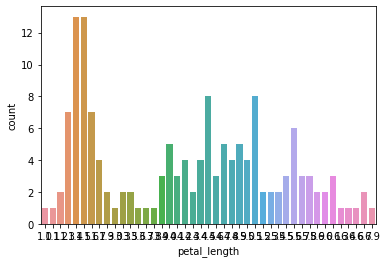

In [53]:
sns.countplot(x='petal_length', data=df, )
plt.show()

### Boxplot
What does a `boxplot` show? With what other function did you get similar results earlier?
In your opinion, why would you need this type of graph?

**Answer**

"Boxplot" displays mean, median, minimum, maxium and quartile values of features for different classes. Earlier we used "describe() to get similar results. These graphs are useful to quickly identify the most efficient features for classification.

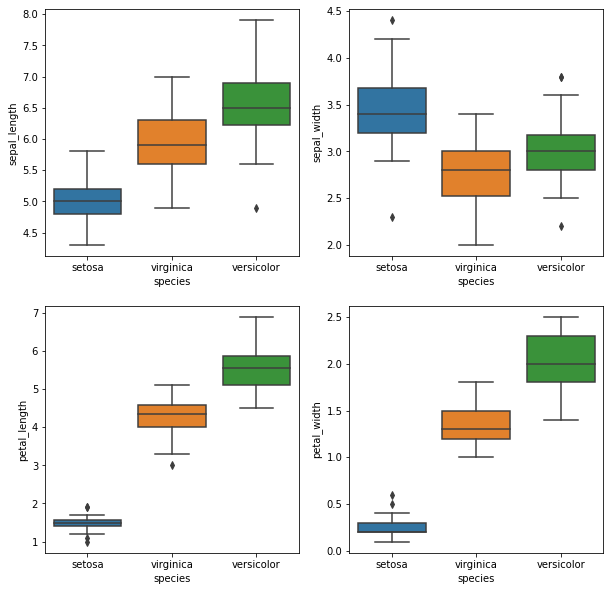

In [54]:
# Utility function to simplify syntax later on
def boxplot(y):
    sns.boxplot(x="species", y=y, data=df)

# We define a figure where we will be adding our graphs
plt.figure(figsize=(10,10))

# And then add the plots to the grid on specific positions
plt.subplot(221)
boxplot('sepal_length')

plt.subplot(222)
boxplot('sepal_width')

plt.subplot(223)
boxplot('petal_length')

plt.subplot(224)
boxplot('petal_width')

plt.show()

### Scatterplot
What does a `scatterplot` show?
What conclusions can you draw from this graph?
Try changing the inputs of the function. Does this change your observations? What new conclusions can you draw from this?

**Answer** 

"Scatterplot" shows a graph in which each observation is a point of coordinate ("value of feature x";"value of feature y"). Each class is represented in a different color. A scatterplot wherin points are concentrated in distinct area per class indicates that the pair of feature chosen for the graph is very useful to classify unlabeled observations.

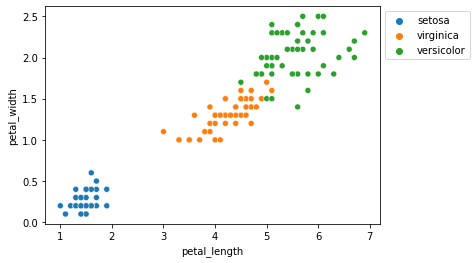

In [55]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df, )
plt.legend(bbox_to_anchor=(1, 1), loc=2) # Displays the legend outside the graph
plt.show()

### Displot
What does a `displot` show?
In the documentation, find what the "kind" parameter does, and try all the kinds of plot.
Can you imagine a use for the kde plots?

**Answer**

"Displot" shows the distribution of each class for one feature. "Kind" changes the representation format. "kde" shows a classic distribution, "ecdf" shows the proportion of observations that have an inferior value to the abscissa one for the selected feature within each class. "kde" is one again useful to find discriminant features, when the distributions do not overlap.

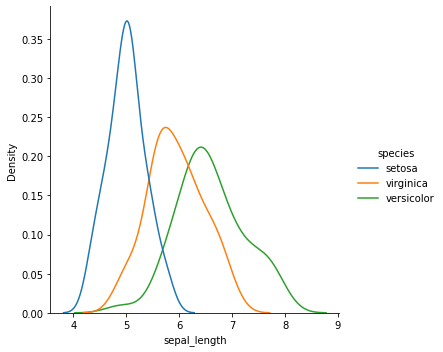

In [56]:
sns.displot(df, x="sepal_length", kind="kde", hue="species")

### Pairplot
What does a `pairplot` show?
Can you draw any new conclusions from it?
In your opinion, what could be the uses of such a graph?

**Answer**

"pairplot" show all the "scatterplot" and "displot" graphs for each pair of features. It offers a global vision to quickly identify the discriminant pairs of features.

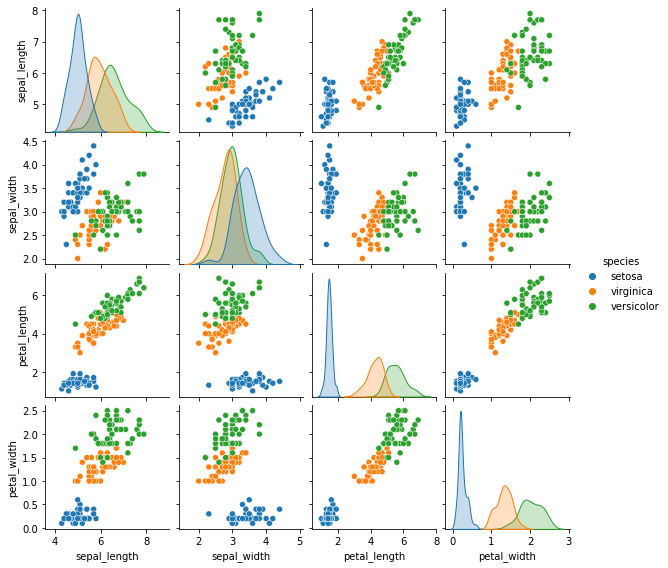

In [57]:
sns.pairplot(df, hue='species', height=2)

### Histogram
Histograms will not teach us anything new here, but they can be another way of visualizing data.

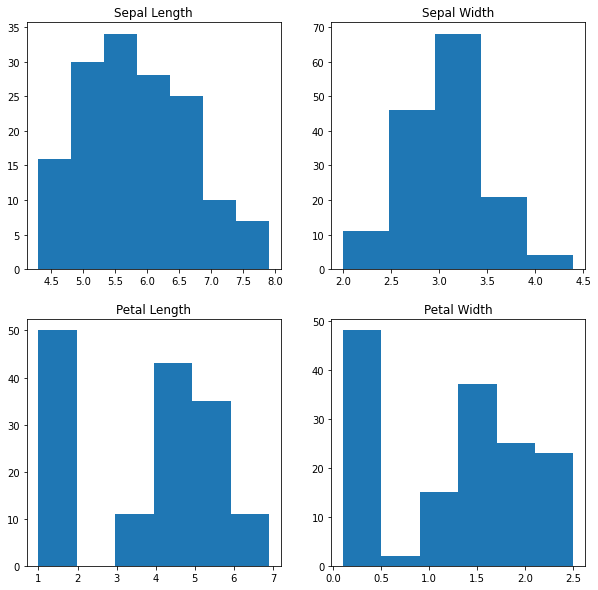

In [58]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['sepal_length'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['sepal_width'], bins=5)

axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['petal_length'], bins=6)

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['petal_width'], bins=6);

### Correlation
Correlation shows the relative importance of variables between each other. It can be computed directly with `pandas`.

In [66]:
df.corr(method='pearson',numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


`heatmaps` make it easier to see which correlations are the most important.

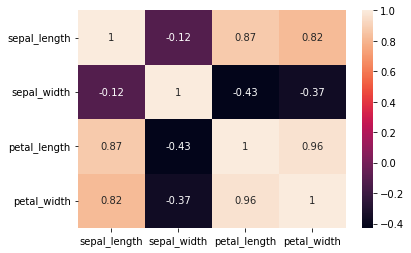

In [67]:
sns.heatmap(df.corr(method='pearson',numeric_only=True),annot = True)
plt.show()

### Covariance
In the same way, try displaying the covariance matrix with a `heatmap`!

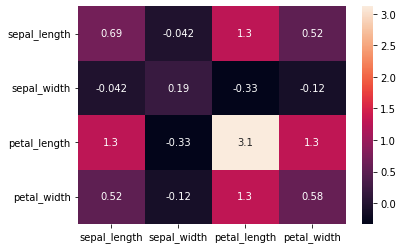

In [71]:
sns.heatmap(df.cov(numeric_only=True),annot = True)
plt.show()